In [3]:
# DATASET
# https://www.kaggle.com/datasets/smid80/weatherww2?resource=download

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sklearn is a machinelearning library that will give us the ML model.
# It's the most useful and robust library for machine learning in Python. 
# It provides a selection of efficient tools for machine learning and statistical
# modeling including classification, regression, clustering and dimensionality reduction

dataset = pd.read_csv("Summary of Weather.csv")

In [4]:
dataset
# we'll be using the MinTemp and MaxTemp columns in this datset
# we'll use the max temp to try and predict the min temp (we already have the minTemp values, this is for training).
# we'll train our ML model to look at all 119040  rows and learn the relationship between the MINTEMP and MAXTEMP columns -> This is called TRAINING our model
# once it understands this relationship, if given a new maxTemp value, it should be able to predit the minTemp from this.


# We section off the data, & take Approx 80% (can be any value but this is the most populaar split) (with this split, the Model has a lot of data to test with, and a good amount of data to test with) of it for TRAINING. The remaining Approx 20% of the data is used for TESTING the ML model, to check that it is making correct predictions.
# For this TESTING data, we will NOT give it the MinTemp, only the Max Temp. (WE KNOW THE MINTEMP but THE ML MODEL DOES NOT) (he mintemp needs to be HIDDEN, so  that the ML model can predit it not copy it).
# We ask the ML model to make its predictions of the MinTemp data from the MaxTemp in the TESTING set. 
# We then compare the ML models' predictions to the real values that were hidden, and check the closeness of the values. If the values are close, then the ML models' predictions are ACCURATE.

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


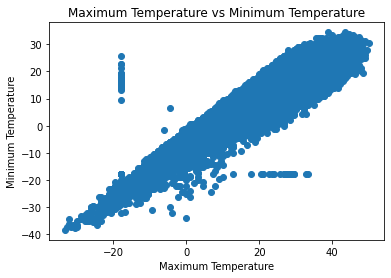

In [5]:
# PLOT THE DATA TO of MaxTemp against MinTemp to GIVE A GRAPH
plt.scatter(dataset["MaxTemp"], dataset["MinTemp"])

plt.title("Maximum Temperature vs Minimum Temperature")
plt.xlabel("Maximum Temperature")
plt.ylabel("Minimum Temperature")
plt.show()

# We can see that as the minTemp increases, the maxTemp increases -> there is a positive correlation b/w them BUT there are some outliers so we can't expect 100% accuracy from our ML model

In [6]:
# .reshape takes the column and turns it into an array
# Getting our dependent and independent variables and reshaping them so we can use test_train_split
# check why minus one
x = dataset["MaxTemp"].values.reshape(-1,1)
y = dataset["MinTemp"].values.reshape(-1,1)

In [7]:
# X_train = the Max_Temp Training set values
# Y_train = the Min_Temp Training set values
# X_test = the Max_Temp Testing set values that we will use to try predict Y_test (Min_Temp values)
# Y_test = the min_temp values that the ML will predict from X_test

# splitting data into training and testing sets AUTOMATICALLY AS 80% for training and 20% for testing
# so 80% of Max_Temp values for training & the corresponding 80% MinTemp values for training
# and the rest 20% Max_Temp values for tedsting & the corresponding 20% MinTemp values for testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [8]:
X_train

array([[28.88888889],
       [24.44444444],
       [28.88888889],
       ...,
       [29.44444444],
       [28.33333333],
       [29.44444444]])

In [9]:
Y_train

array([[22.77777778],
       [21.11111111],
       [23.33333333],
       ...,
       [23.33333333],
       [17.77777778],
       [13.88888889]])

In [10]:
# Training our ML model
# In the training set, the ML model has a look at the maxTemp and minTemp for each row, and tries to find a relationship.

# fitting the linear regression model to our training data
# xtrain = maxtemp ytrain = mintemp
# this is a simple example, so the model is trained very quickly. In some casse the training could take overnight.
model = LinearRegression().fit(X_train, Y_train)

In [11]:
# .score() will score our model and see how well it is making predictions on the TEST set.
# once the ML model has made predictions (on what minTemp is), the .score() will compare theses predictions to the ACTUAL values (of minTemp), that we know

In [12]:
# make predictions of the minTemp values from the TEST SET maxTemp values
y_prediction = model.predict(X_test)

In [13]:
y_prediction

array([[16.53909909],
       [ 4.89408189],
       [21.19710596],
       ...,
       [23.99191008],
       [17.47070046],
       [23.06030871]])

In [14]:
Y_test

array([[20.55555556],
       [ 6.11111111],
       [26.11111111],
       ...,
       [27.22222222],
       [20.        ],
       [20.        ]])

In [15]:
# score() takes in data given in 1st parameter (X_TEST)(MAXTEMP), uses the MODEL (we named this model) 
# to predict YVALUES (MINTEMP) and compares these predictions to the values in the 2nd parameter (Y_TEST) (MINTEMP)
model_accuracy = model.score(X_test, Y_test)

In [16]:
print(model_accuracy)
# Our model has a 76.9% accuracy

0.7803697694156216


In [17]:
# why we don't care about a TRAINING SET score
# because in our training set, the ml model can look at BOTH columns aka, it has already seen the ANSWER aka it has already seen the value we are trying to predict.
# the ML model can see the answer, but is still making a prediction. This is why we do not care about a TRAINING SET score

# for a testing set, the ML model makes a prediction FIRST before looking at the answer

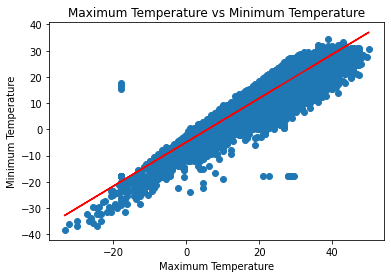

In [18]:
# Plotting a line of best fit
# making a scatter graph of all our test data, then plot the prediction

plt.scatter(X_test, Y_test)
plt.plot(X_test, y_prediction, color="r")
plt.title("Maximum Temperature vs Minimum Temperature")
plt.xlabel("Maximum Temperature")
plt.ylabel("Minimum Temperature")
plt.show()

# our predictions follow the trend, we can say the accuracy is pretty good